In [11]:
import os
import h5py
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import nibabel as nb
import seaborn as sns
from scipy.io import loadmat
from nilearn import plotting
import matplotlib.pyplot as plt
from brainspace.gradient import GradientMaps
import plot_funcs

### vizualize mean FC along hippocampus

In [2]:
# data dirs
ddir     = '../data/'   
conndir  = '../data/tout_hippoc/' 
odir     = '../data/tout_group/'

# get HCP - S900 subject list        
subjlist = '../data/subjectListS900_QC_gr.txt'
f = open(subjlist); mylist = f.read().split("\n"); f.close() 
subjlist = joinedlist = mylist[:-1]
print('We have now %i subjects... ' % (len(subjlist)))  # 709


We have now 709 subjects... 


### Left hipp.

In [41]:
fc_left = np.zeros((4096, 360))

j = 0
for subjID in subjlist:

    fname = os.path.join(conndir, 'HCP_' + subjID + '_left.h5')
    f = h5py.File(fname, 'r')
    f = np.array(f['HCP_' + subjID])

    fc_left = fc_left + f
    j += 1
    
fc_left = fc_left / j

###
h = h5py.File('../data/tout_group/Hmean709_FC_left.h5', 'w')
h.create_dataset('data', data = fc_left)
h.close()
###

fc_left.min(), fc_left.max(), fc_left.shape, j

(-0.005300521852874321, 0.39153784016161197, (4096, 360), 709)

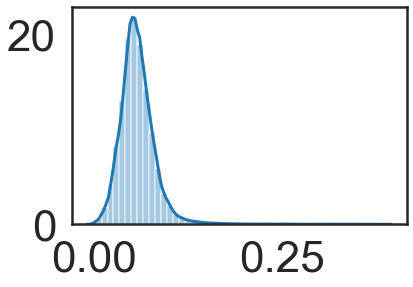

In [42]:
sns.distplot(fc_left.flatten())

### LSUB

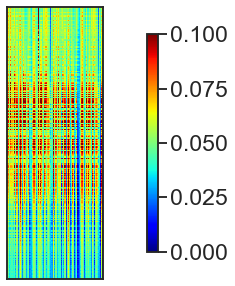

In [43]:
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_left[0:1024,:], 
                           colorbar=True, 
                           cmap='jet', axes=ax1, vmin=0., vmax=0.1)

#plt.savefig('../figures/FC_hip_lsub.png',
#            format='png',dpi=300)

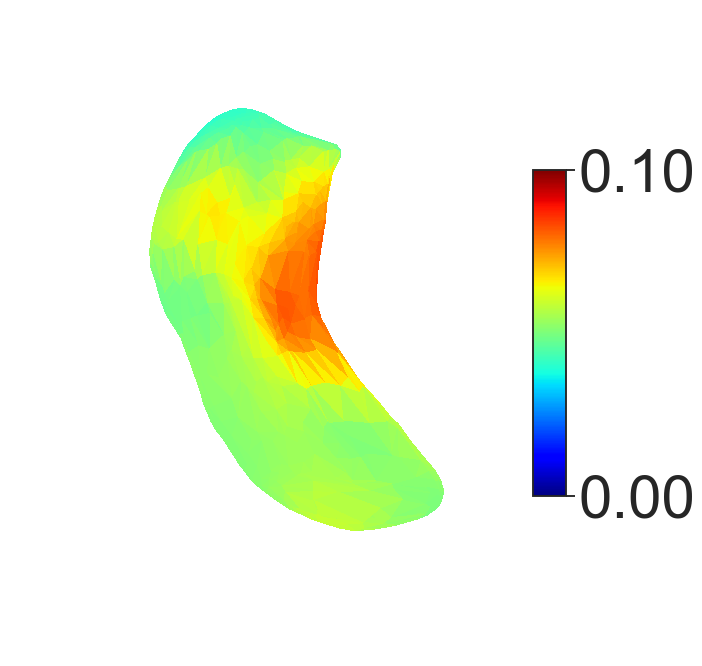

In [44]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  fc_left[0:1024,:].mean(axis=1), 'jet', 0, 0.1)

#plt.savefig('../figures/FC_hip_mean_lsub.png',
#            format='png',dpi=300)

### LCA

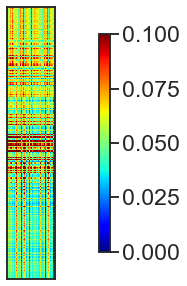

In [15]:
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_left[1024:1024+2048,:], 
                           colorbar=True, cmap='jet', axes=ax1, vmin=0., vmax=0.1)

#plt.savefig('../figures/FC_hip_lca.png',
#            format='png',dpi=300)

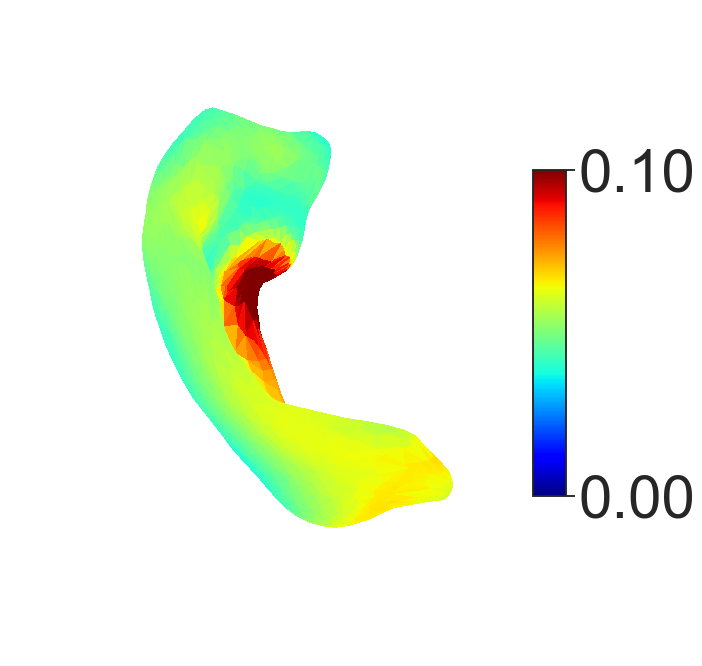

In [17]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                            plot_funcs.yLCA, 
                            plot_funcs.zLCA, 
                            plot_funcs.triLCA, 
                            fc_left[1024:1024+2048,:].mean(axis=1), 'jet', 0, 0.1)

#plt.savefig('../figures/FC_hip_mean_lca.png',
#            format='png',dpi=300)

### LDG

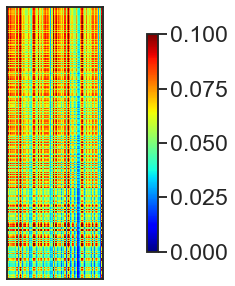

In [18]:
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_left[1024+2048:1024+2048+1024,:], 
                           colorbar=True, cmap='jet', axes=ax1, vmin=0., vmax=0.1)

#plt.savefig('../figures/FC_hip_ldg.png',
#            format='png',dpi=300)

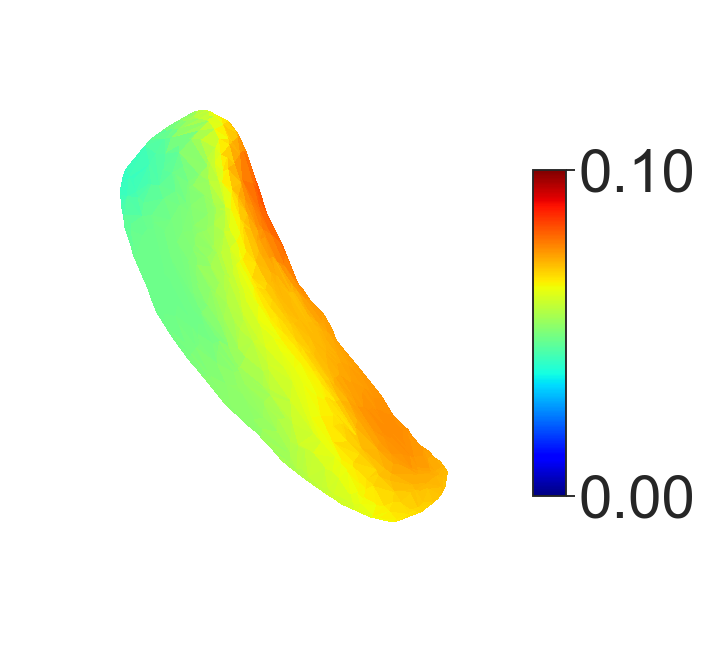

In [19]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLDG,
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  fc_left[1024+2048:1024+2048+1024,:].mean(axis=1), 
                                  'jet', 0, 0.1)

#plt.savefig('../figures/FC_hip_mean_ldg.png',
#            format='png',dpi=300)

### get the heritability solar results

In [45]:
tot_node_num = 360
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))

node_str[0], '...', node_str[-1]

360


('node_1', '...', 'node_360')

In [49]:
topdir = '../solar/FC_LSUB/'

H_LSUB = np.zeros((1024, 360))
P_LSUB = np.zeros((1024, 360))

for low_i in range(0, 1024):
 
    lowdir = 'fc_' + str(low_i+1)
    fname = os.path.join(topdir, lowdir, 'fc_lsub_results_herit.txt')

    results = pd.read_csv(fname, index_col = 0, header = 0)
    results.index.name = 'node'

    df_results = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

    for nodeID in range(1, tot_node_num+1):

        #print(low_i, nodeID)
        
        iA = results.index.get_loc(nodeID)
        iB = df_results.index.get_loc('node_'+ str(nodeID))

        df_results.iloc[iB]['H2r'] = results.iloc[iA]['H2r']
        df_results.iloc[iB]['rp']  = results.iloc[iA]['rp']

    H_LSUB[low_i, :] = np.array(df_results['H2r'], dtype='float64')
    P_LSUB[low_i, :] = np.array(df_results['rp'], dtype='float64')


In [52]:
topdir = '../solar/FC_LCA/'

H_LCA = np.zeros((2048, 360))
P_LCA = np.zeros((2048, 360))

for low_i in range(0, 2048):
 
    lowdir = 'fc_' + str(low_i+1)
    fname = os.path.join(topdir, lowdir, 'fc_lca_results_herit.txt')

    results = pd.read_csv(fname, index_col = 0, header = 0)
    results.index.name = 'node'

    df_results = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

    for nodeID in range(1, tot_node_num+1):

        #print(low_i, nodeID)
        
        iA = results.index.get_loc(nodeID)
        iB = df_results.index.get_loc('node_'+ str(nodeID))

        df_results.iloc[iB]['H2r'] = results.iloc[iA]['H2r']
        df_results.iloc[iB]['rp']  = results.iloc[iA]['rp']

    H_LCA[low_i, :] = np.array(df_results['H2r'], dtype='float64')
    P_LCA[low_i, :] = np.array(df_results['rp'], dtype='float64')


In [73]:
topdir = '../solar/FC_LDG/'

H_LDG = np.zeros((1024, 360))
P_LDG = np.zeros((1024, 360))

for low_i in range(0, 1024):
 
    lowdir = 'fc_' + str(low_i+1)
    fname = os.path.join(topdir, lowdir, 'fc_ldg_results_herit.txt')

    results = pd.read_csv(fname, index_col = 0, header = 0)
    results.index.name = 'node'

    df_results = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

    for nodeID in range(1, tot_node_num+1):

        #print(low_i, nodeID)
        
        iA = results.index.get_loc(nodeID)
        iB = df_results.index.get_loc('node_'+ str(nodeID))

        df_results.iloc[iB]['H2r'] = results.iloc[iA]['H2r']
        df_results.iloc[iB]['rp']  = results.iloc[iA]['rp']

    H_LDG[low_i, :] = np.array(df_results['H2r'], dtype='float64')
    P_LDG[low_i, :] = np.array(df_results['rp'], dtype='float64')


In [84]:
H = np.concatenate((H_LSUB, H_LCA, H_LDG), axis=0)
P = np.concatenate((P_LSUB, P_LCA, P_LDG), axis=0)



###
h = h5py.File('../data/tout_group/Hmean709_FC_herit_left.h5', 'w')
h.create_dataset('h2r', data = H)
h.create_dataset('p', data = P)
h.close()
###



### read in & plot

In [100]:
ddir = '../data/tout_group'

ffile = h5py.File(os.path.join(ddir, 'Hmean709_FC_herit_left.h5'), 'r')

fc_herit_left = np.array(ffile['h2r'])

# check for nan
fc_herit_left[np.where(np.isnan(fc_herit_left))] = 0

fc_herit_left.shape


(4096, 360)

### LSUB

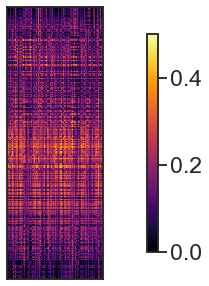

In [101]:
from nilearn import plotting
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_herit_left[0:1024, :],
                           colorbar=True, cmap='inferno', axes=ax1, vmin=0., vmax=0.5)

#plt.savefig('../figures/FC_herit_lsub.png',
#            format='png',dpi=300)

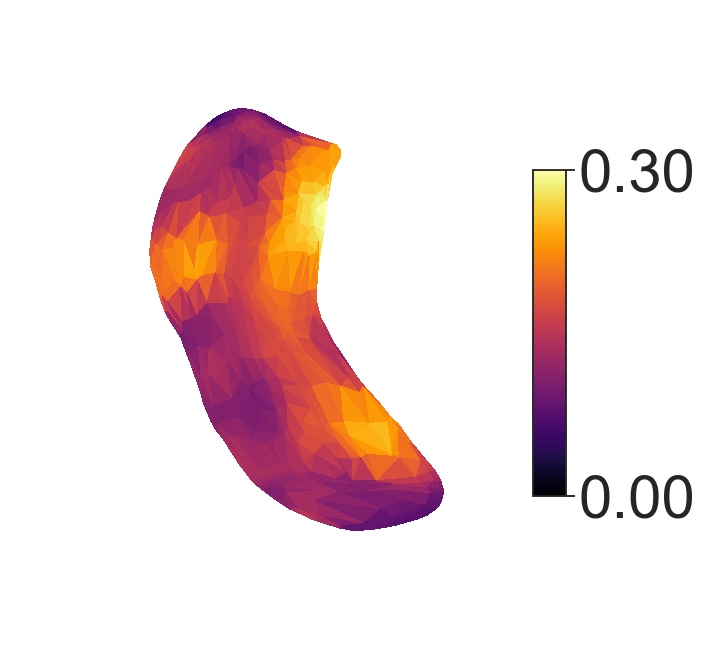

In [108]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  fc_herit_left[0:1024, :].mean(axis=1), 'inferno', 0, 0.3)

#plt.savefig('../figures/FC_herit_mean_lsub.png',
#            format='png',dpi=300)

### LCA

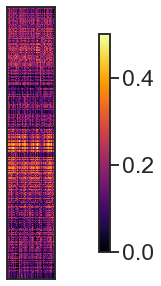

In [110]:
from nilearn import plotting
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_herit_left[1024:1024+2048, :],
                           colorbar=True, cmap='inferno', axes=ax1, vmin=0., vmax=0.5)

#plt.savefig('../figures/FC_herit_lca.png',
#            format='png',dpi=300)

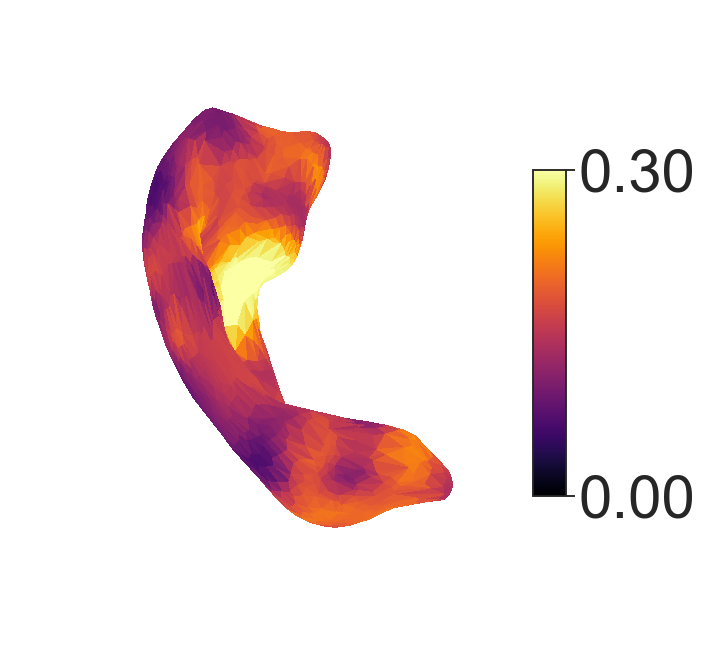

In [112]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  fc_herit_left[1024:1024+2048,:].mean(axis=1), 'inferno', 0, 0.3)

#plt.savefig('../figures/FC_herit_mean_lca.png',
#            format='png',dpi=300)

### LDG

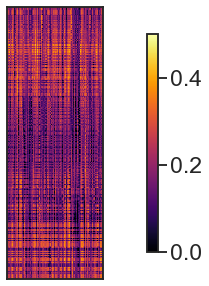

In [114]:
from nilearn import plotting
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_herit_left[1024+2048:1024+2048+1024, :],
                           colorbar=True, cmap='inferno', axes=ax1, vmin=0., vmax=0.5)

#plt.savefig('../figures/FC_herit_ldg.png',
#            format='png',dpi=300)

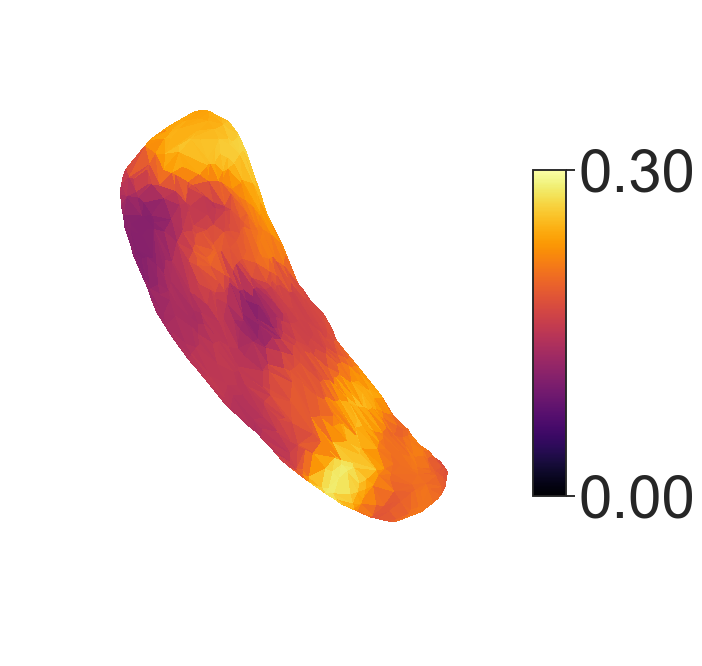

In [116]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  fc_herit_left[1024+2048:1024+2048+1024,:].mean(axis=1), 'inferno', 0, 0.3)

#plt.savefig('../figures/FC_herit_mean_ldg.png',
#            format='png',dpi=300)

### association between mean FC and its heritability

### LSUB

In [117]:
pearsonr(fc_left[0:1024,:].mean(axis=1), 
         fc_herit_left[0:1024].mean(axis=1))

(0.6171908466571576, 1.5380692946427692e-108)

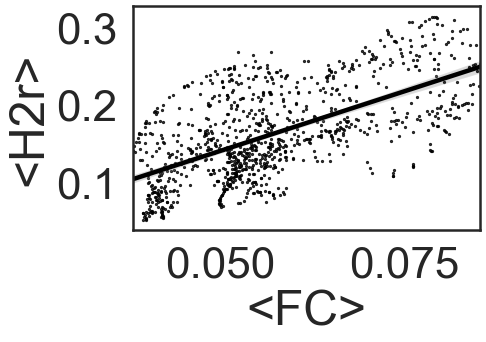

In [118]:
sns.set_context("poster", font_scale=2)
sns.set_style('white')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(fc_left[0:1024,:].mean(axis=1), 
                  fc_herit_left[0:1024].mean(axis=1),
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='<H2r>')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/FC_herit_FC_corr_LSUB.png")


### LCA

In [119]:
pearsonr(fc_left[1024:1024+2048,:].mean(axis=1), 
         fc_herit_left[1024:1024+2048,:].mean(axis=1))

(0.6408898204529596, 2.9076901538740724e-237)

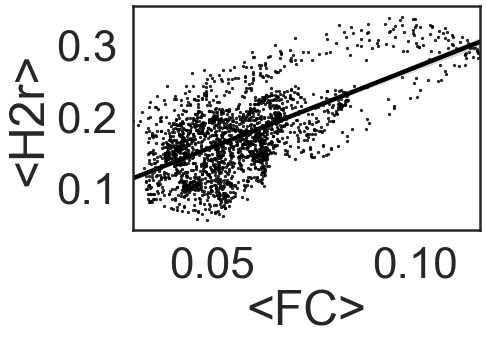

In [120]:
sns.set_context("poster", font_scale=2)
sns.set_style('white')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(fc_left[1024:1024+2048,:].mean(axis=1), 
                  fc_herit_left[1024:1024+2048,:].mean(axis=1),
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='<H2r>')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/FC_herit_FC_corr_LCA.png")


### LDG

In [121]:
pearsonr(fc_left[1024+2048:1024+2048+1024,:].mean(axis=1), 
         fc_herit_left[1024+2048:1024+2048+1024,:].mean(axis=1))

(0.534541735802391, 9.77804530482287e-77)

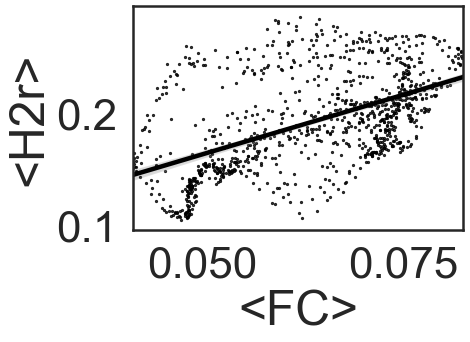

In [122]:
sns.set_context("poster", font_scale=2)
sns.set_style('white')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(fc_left[1024+2048:1024+2048+1024,:].mean(axis=1), 
                  fc_herit_left[1024+2048:1024+2048+1024,:].mean(axis=1),
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='<H2r>')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/FC_herit_FC_corr_LDG.png")


### gradients of the heritability of the mean FC ;) 

In [164]:
fc_herit_left.shape

(4096, 360)

In [218]:
# data dir
ddir     = '../data/tout_hippoc/'   

# LEFT HIPPOCAMPUS    
group_gradient_file = '../data/tout_group/Hmean709connGradients_left.h5'
with h5py.File(group_gradient_file, 'r') as g:
    group_gradients = np.array(g['gradients_'])  # (4096, 10)
print('Left: We had computed group-level gradients : ', group_gradients.shape)  


fc_herit_left_LSUB   = fc_herit_left[0:1024, :]
group_gradients_LSUB = group_gradients[0:1024,:]

# aligning individual gradient to group-level gradient
galign = GradientMaps(kernel = 'normalized_angle', 
                      approach = 'dm', 
                      alignment = 'procrustes')

galign.fit(fc_herit_left_LSUB, reference = group_gradients_LSUB)

G1_LSUB = galign.gradients_[:,0]  
G2_LSUB = galign.gradients_[:,1]  
G3_LSUB = galign.gradients_[:,2]  




fc_herit_left_LCA    = fc_herit_left[1024:1024+2048, :]
group_gradients_LCA = group_gradients[1024:1024+2048,:]

# aligning individual gradient to group-level gradient
galign = GradientMaps(kernel = 'normalized_angle', 
                      approach = 'dm', 
                      alignment = 'procrustes')

galign.fit(fc_herit_left_LCA, reference = group_gradients_LCA)

G1_LCA = galign.gradients_[:,0]  
G2_LCA = galign.gradients_[:,1]  
G3_LCA = galign.gradients_[:,2]  




fc_herit_left_LDG    = fc_herit_left[1024+2048:1024+2048+1024, :]
group_gradients_LDG  = group_gradients[1024+2048:1024+2048+1024,:]

# aligning individual gradient to group-level gradient
galign = GradientMaps(kernel = 'normalized_angle', 
                      approach = 'dm', 
                      alignment = 'procrustes')

galign.fit(fc_herit_left_LDG, reference = group_gradients_LDG)

G1_LDG = galign.gradients_[:,0]  
G2_LDG = galign.gradients_[:,1]  
G3_LDG = galign.gradients_[:,2]  




Left: We had computed group-level gradients :  (4096, 10)


### check the Procrustes

In [230]:
pearsonr(G1_LSUB, group_gradients_LSUB[:,0])

(0.06486314757586459, 0.03796140436009402)

In [231]:
pearsonr(G1_LSUB, group_gradients_LSUB[:,1])

(-0.1284875985917265, 3.7285887299105175e-05)

In [233]:
### pearsonr(G1_LCA, group_gradients_LCA[:,0]) --> this was negative
G1_LCA = -1 * G1_LCA
pearsonr(G1_LCA, group_gradients_LCA[:,0])

(0.18058430267980718, 1.7938645575637753e-16)

In [234]:
pearsonr(G1_LCA, group_gradients_LCA[:,1])

(-0.135422844504276, 7.595337461342247e-10)

In [236]:
### pearsonr(G1_LDG, group_gradients_LDG[:,0]) --> this was negative
G1_LDG = -1 * G1_LDG
pearsonr(G1_LDG, group_gradients_LDG[:,0])


(0.052095135933286706, 0.09568560011393254)

In [237]:
pearsonr(G1_LDG, group_gradients_LDG[:,1])

(0.027816676418198134, 0.37388565644848554)

In [238]:
pearsonr(G2_LSUB, group_gradients_LSUB[:,0])

(0.8586574329457739, 6.508738273076708e-299)

In [239]:
pearsonr(G2_LSUB, group_gradients_LSUB[:,1])

(0.4918391185898208, 1.7479617614385113e-63)

In [242]:
pearsonr(G2_LCA, group_gradients_LCA[:,0]) 

(-0.16155522154372418, 1.9084778911572792e-13)

In [241]:
pearsonr(G2_LCA, group_gradients_LCA[:,1]) 

(0.2504302696867775, 1.1727281697393897e-30)

In [323]:
pearsonr(G2_LDG, group_gradients_LDG[:,0])

(-0.8214883658146368, 1.4514054974544504e-251)

In [322]:
pearsonr(G2_LDG, group_gradients_LDG[:,1])

(0.4509259247663635, 1.965552904903088e-52)

In [245]:
G1 = np.concatenate((G1_LSUB, G1_LCA, G1_LDG), axis=0)
G2 = np.concatenate((G2_LSUB, G2_LCA, G2_LDG), axis=0)
G3 = np.concatenate((G3_LSUB, G3_LCA, G3_LDG), axis=0)

G = np.array([G1, G2, G3]).T
G.shape


###
h = h5py.File('../data/tout_group/Hmean709_FC_herit_gradients_left.h5', 'w')
h.create_dataset('gradients', data = G)
h.close()
###



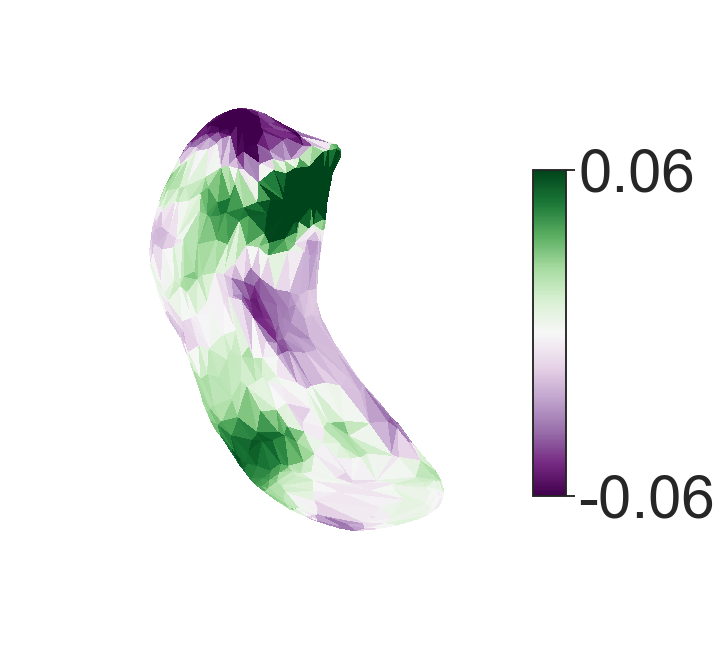

In [247]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  G1_LSUB, 'PRGn', -0.06, 0.06)

#plt.savefig('../figures/FC_herit_G1_lsub.png',
#            format='png',dpi=300)

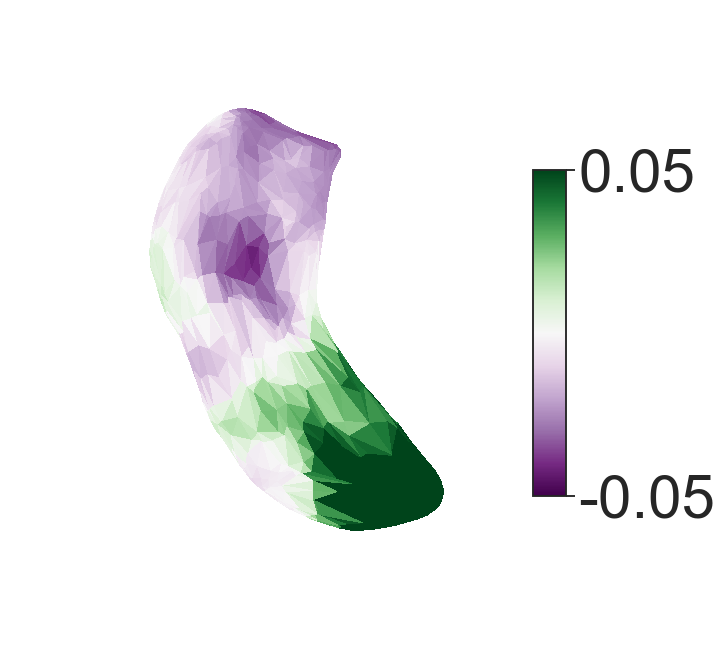

In [249]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  G2_LSUB, 'PRGn', -0.05, 0.05)

#plt.savefig('../figures/FC_herit_G2_lsub.png',
#            format='png',dpi=300)

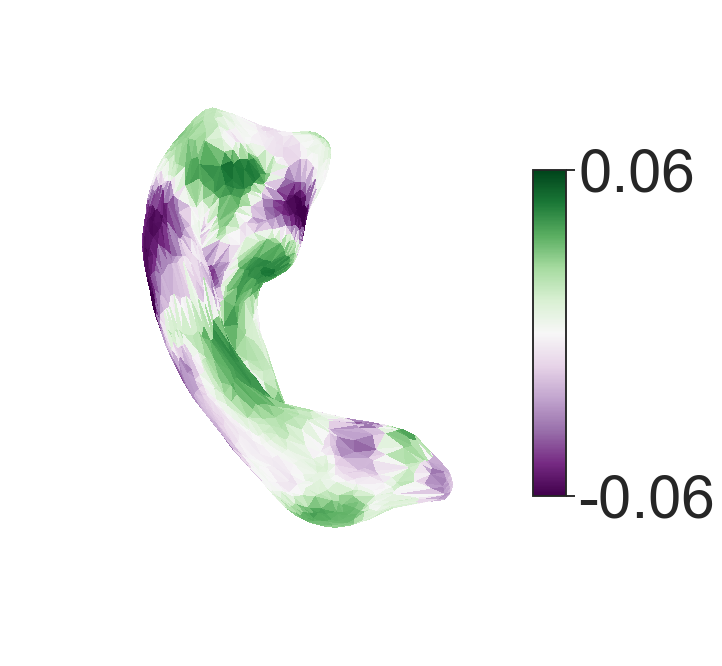

In [251]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  G1_LCA, 'PRGn', -0.06, 0.06)

#plt.savefig('../figures/FC_herit_G1_lca.png',
#                        format='png',dpi=300)

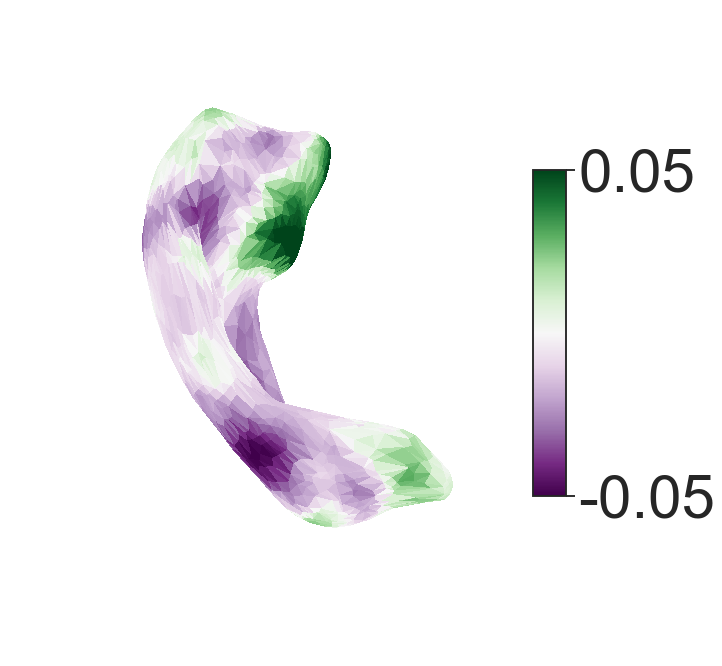

In [253]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                  plot_funcs.yLCA, 
                                  plot_funcs.zLCA, 
                                  plot_funcs.triLCA, 
                                  G2_LCA, 'PRGn', -0.05, 0.05)

#plt.savefig('../figures/FC_herit_G2_lca.png',
#                        format='png',dpi=300)

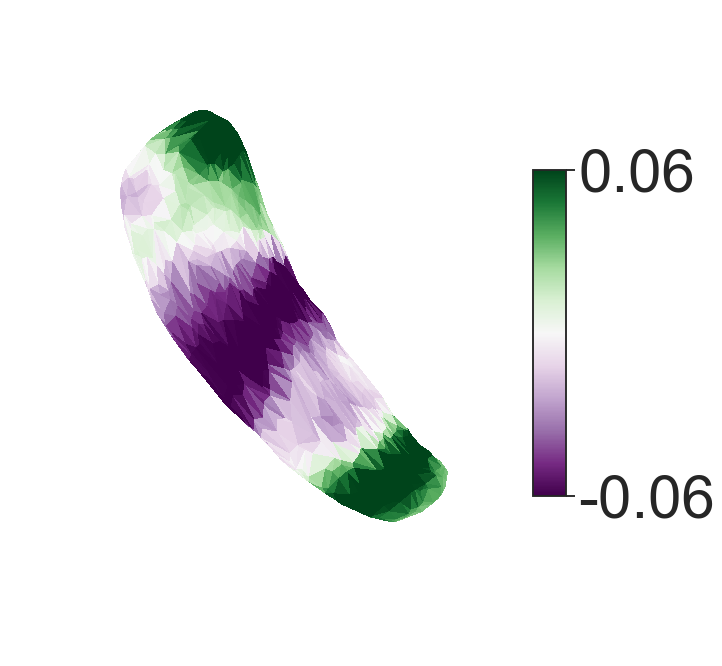

In [255]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  G1_LDG, 'PRGn', -0.06, 0.06)

#plt.savefig('../figures/FC_herit_G1_ldg.png',
#            format='png',dpi=300)

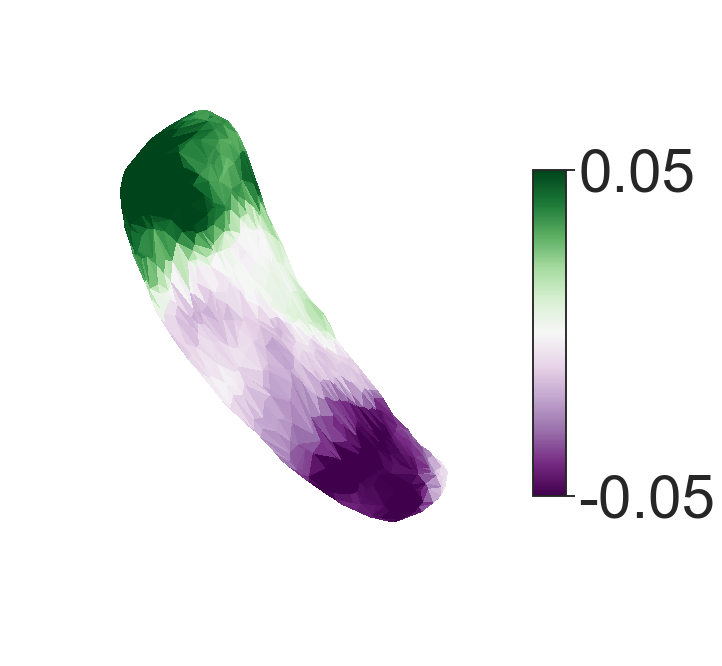

In [257]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                  plot_funcs.yLDG, 
                                  plot_funcs.zLDG, 
                                  plot_funcs.triLDG, 
                                  G2_LDG, 'PRGn', -0.05, 0.05)

#plt.savefig('../figures/FC_herit_G2_ldg.png',
#            format='png',dpi=300)

# Right

In [123]:
fc_right = np.zeros((4096, 360))

j = 0
for subjID in subjlist:

    fname = os.path.join(conndir, 'HCP_' + subjID + '_right.h5')
    f = h5py.File(fname, 'r')
    f = np.array(f['HCP_' + subjID])

    fc_right = fc_right + f
    j += 1
    
fc_right = fc_right / j

fc_right.min(), fc_right.max(), fc_right.shape, j

(-0.0038900235736077002, 0.46109901886372273, (4096, 360), 709)

In [124]:
###
h = h5py.File('../data/tout_group/Hmean709_FC_right.h5', 'w')
h.create_dataset('data', data = fc_right)
h.close()
###

### RSUB

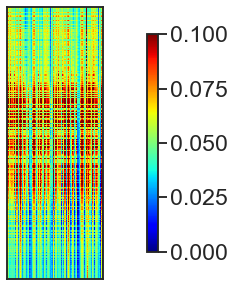

In [126]:
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_right[0:1024,:], 
                           colorbar=True, cmap='jet', axes=ax1, vmin=0., vmax=0.1)

#plt.savefig('../figures/FC_hip_rsub.png',
#            format='png',dpi=300)

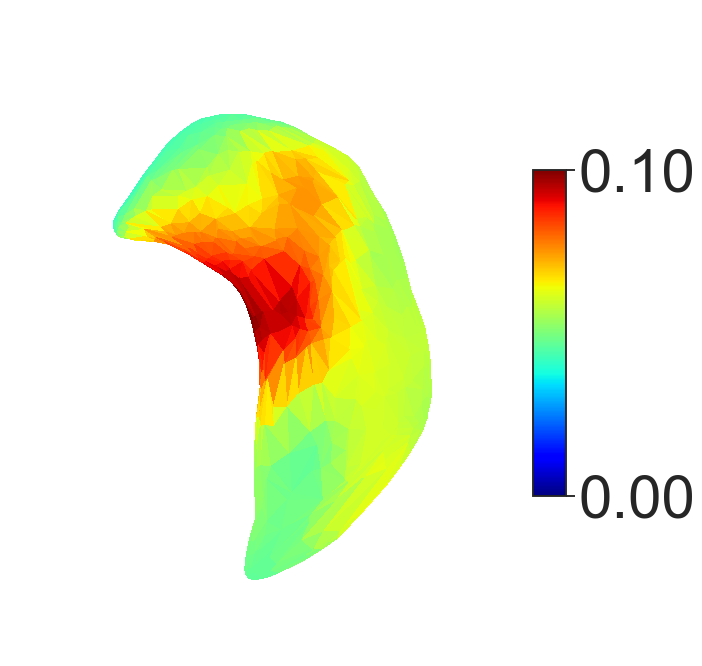

In [127]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  fc_right[0:1024,:].mean(axis=1), 'jet', 0, 0.1)

#plt.savefig('../figures/FC_hip_mean_rsub.png',
#            format='png',dpi=300)

### RCA

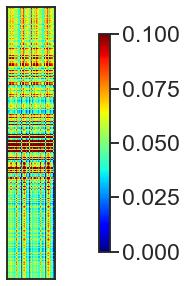

In [129]:
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_right[1024:1024+2048,:], 
                           colorbar=True, cmap='jet', axes=ax1, vmin=0., vmax=0.1)

#plt.savefig('../figures/FC_hip_rca.png',
#            format='png',dpi=300)

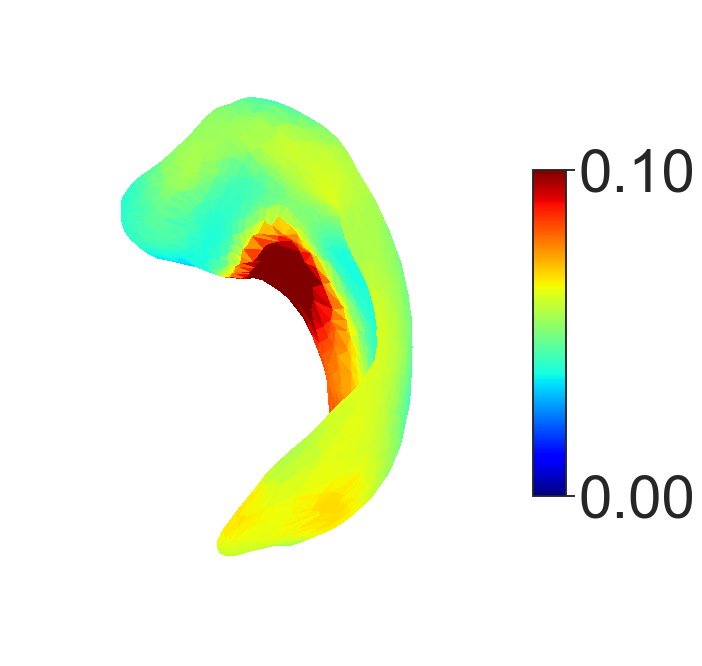

In [326]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  fc_right[1024:1024+2048,:].mean(axis=1), 'jet', 0, 0.1)

#plt.savefig('../figures/FC_hip_mean_rca.png',
#            format='png',dpi=300)

### RDG

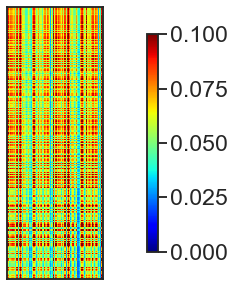

In [131]:
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_right[1024+2048:1024+2048+1024,:], 
                           colorbar=True, cmap='jet', axes=ax1, vmin=0., vmax=0.1)

#plt.savefig('../figures/FC_hip_rdg.png',
#            format='png',dpi=300)

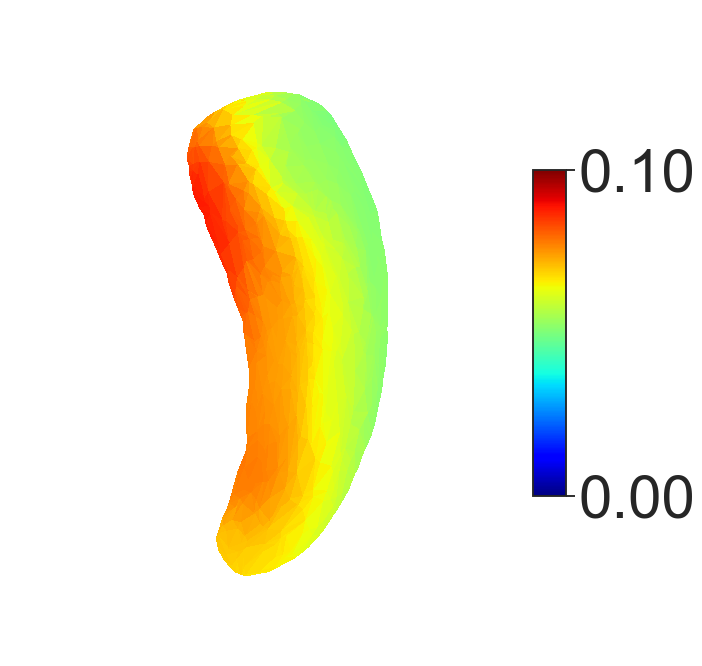

In [133]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRDG, 
                                  plot_funcs.yRDG, 
                                  plot_funcs.zRDG, 
                                  plot_funcs.triRDG, 
                                  fc_right[1024+2048:1024+2048+1024,:].mean(axis=1), 'jet', 0, 0.1)



#plt.savefig('../figures/FC_hip_mean_rdg.png',
#            format='png',dpi=300)

### get heritability solar results, RIGHT

In [135]:
tot_node_num = 360
node_str = []
for i in range(1, tot_node_num+1):
    node_str.append('node_'+ str(i))
print(len(node_str))

node_str[0], '...', node_str[-1]

360


('node_1', '...', 'node_360')

In [136]:
topdir = '../solar/FC_RSUB/'

H_RSUB = np.zeros((1024, 360))
P_RSUB = np.zeros((1024, 360))

for low_i in range(0, 1024):
 
    lowdir = 'fc_' + str(low_i+1)
    fname = os.path.join(topdir, lowdir, 'fc_rsub_results_herit.txt')

    results = pd.read_csv(fname, index_col = 0, header = 0)
    results.index.name = 'node'

    df_results = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

    for nodeID in range(1, tot_node_num+1):

        #print(low_i, nodeID)
        
        iA = results.index.get_loc(nodeID)
        iB = df_results.index.get_loc('node_'+ str(nodeID))

        df_results.iloc[iB]['H2r'] = results.iloc[iA]['H2r']
        df_results.iloc[iB]['rp']  = results.iloc[iA]['rp']

    H_RSUB[low_i, :] = np.array(df_results['H2r'], dtype='float64')
    P_RSUB[low_i, :] = np.array(df_results['rp'], dtype='float64')


In [139]:
np.nanmax(H_RSUB)

0.5676413

In [140]:
topdir = '../solar/FC_RCA/'

H_RCA = np.zeros((2048, 360))
P_RCA = np.zeros((2048, 360))

for low_i in range(0, 2048):
 
    lowdir = 'fc_' + str(low_i+1)
    fname = os.path.join(topdir, lowdir, 'fc_rca_results_herit.txt')

    results = pd.read_csv(fname, index_col = 0, header = 0)
    results.index.name = 'node'

    df_results = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

    for nodeID in range(1, tot_node_num+1):

        #print(low_i, nodeID)
        
        iA = results.index.get_loc(nodeID)
        iB = df_results.index.get_loc('node_'+ str(nodeID))

        df_results.iloc[iB]['H2r'] = results.iloc[iA]['H2r']
        df_results.iloc[iB]['rp']  = results.iloc[iA]['rp']

    H_RCA[low_i, :] = np.array(df_results['H2r'], dtype='float64')
    P_RCA[low_i, :] = np.array(df_results['rp'], dtype='float64')


In [ ]:
np.nanmax(H_RCA)

In [141]:
topdir = '../solar/FC_RDG/'

H_RDG = np.zeros((1024, 360))
P_RDG = np.zeros((1024, 360))

for low_i in range(0, 1024):
 
    lowdir = 'fc_' + str(low_i+1)
    fname = os.path.join(topdir, lowdir, 'fc_rdg_results_herit.txt')

    results = pd.read_csv(fname, index_col = 0, header = 0)
    results.index.name = 'node'

    df_results = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

    for nodeID in range(1, tot_node_num+1):

        #print(low_i, nodeID)
        
        iA = results.index.get_loc(nodeID)
        iB = df_results.index.get_loc('node_'+ str(nodeID))

        df_results.iloc[iB]['H2r'] = results.iloc[iA]['H2r']
        df_results.iloc[iB]['rp']  = results.iloc[iA]['rp']

    H_RDG[low_i, :] = np.array(df_results['H2r'], dtype='float64')
    P_RDG[low_i, :] = np.array(df_results['rp'], dtype='float64')


In [143]:
np.nanmax(H_RDG)

0.5263193

In [144]:
HR = np.concatenate((H_RSUB, H_RCA, H_RDG), axis=0)
PR = np.concatenate((P_RSUB, P_RCA, P_RDG), axis=0)



###
h = h5py.File('../data/tout_group/Hmean709_FC_herit_right.h5', 'w')
h.create_dataset('h2r', data = HR)
h.create_dataset('p', data = PR)
h.close()
###



### read in and plot, Right

In [146]:
ddir = '../data/tout_group'

ffile = h5py.File(os.path.join(ddir, 'Hmean709_FC_herit_right.h5'), 'r')

fc_herit_right = np.array(ffile['h2r'])

# check for nan
fc_herit_right[np.where(np.isnan(fc_herit_right))] = 0

fc_herit_right.shape


(4096, 360)

### RSUB

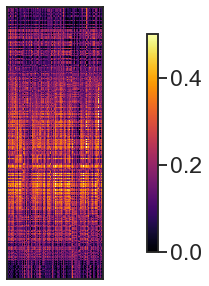

In [149]:
from nilearn import plotting
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_herit_right[0:1024, :],
                           colorbar=True, cmap='inferno', axes=ax1, vmin=0., vmax=0.5)

#plt.savefig('../figures/FC_herit_rsub.png',
#            format='png',dpi=300)

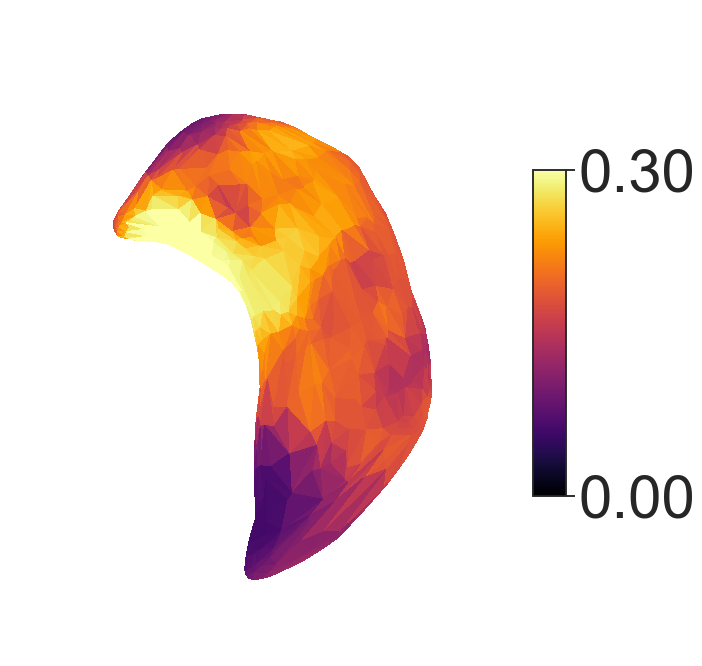

In [151]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  fc_herit_right[0:1024, :].mean(axis=1), 'inferno', 0, 0.3)

#plt.savefig('../figures/FC_herit_mean_rsub.png',
#            format='png',dpi=300)

### RCA

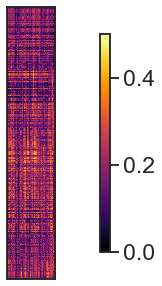

In [152]:
from nilearn import plotting
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_herit_right[1024:1024+2028, :],
                           colorbar=True, cmap='inferno', axes=ax1, vmin=0., vmax=0.5)

#plt.savefig('../figures/FC_herit_rca.png',
#            format='png',dpi=300)

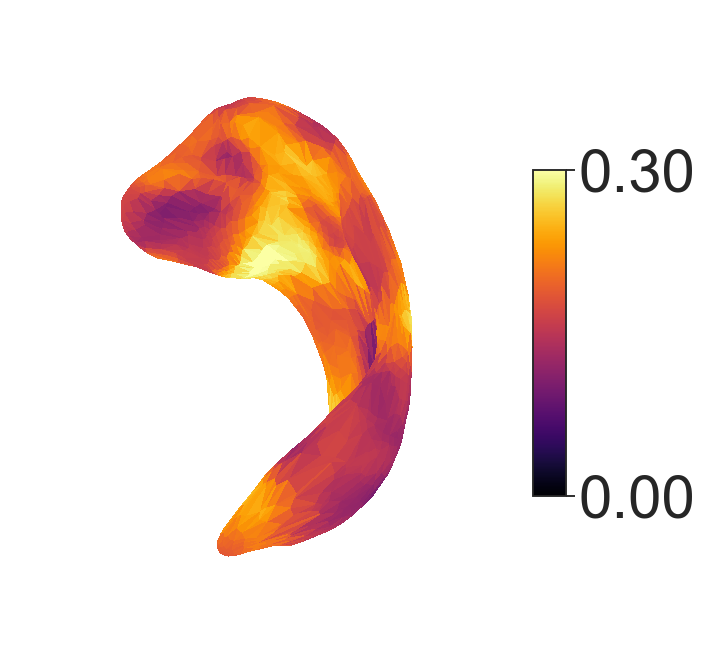

In [155]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  fc_herit_right[1024:1024+2048, :].mean(axis=1), 'inferno', 0, 0.3)

#plt.savefig('../figures/FC_herit_mean_rca.png',
#            format='png',dpi=300)

### RDG

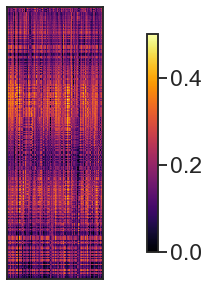

In [156]:
from nilearn import plotting
sns.set_context("talk", font_scale=1.4)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

fig = plotting.plot_matrix(fc_herit_right[1024+2028:1024+2028+1024, :],
                           colorbar=True, cmap='inferno', axes=ax1, vmin=0., vmax=0.5)

#plt.savefig('../figures/FC_herit_rdg.png',
#            format='png',dpi=300)

### associations between mean FC and its heritability, Right

In [157]:
pearsonr(fc_right[0:1024,:].mean(axis=1), 
         fc_herit_right[0:1024,:].mean(axis=1))

(0.7388024332127395, 2.3298286661958664e-177)

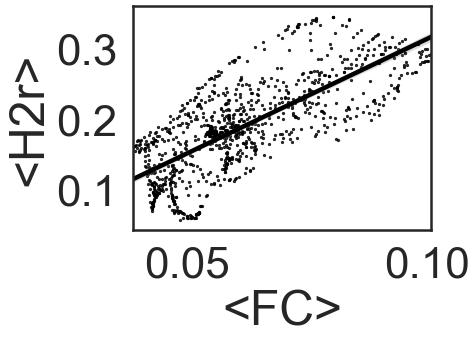

In [158]:
sns.set_context("poster", font_scale=2)
sns.set_style('white')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(fc_right[0:1024,:].mean(axis=1), 
                  fc_herit_right[0:1024,:].mean(axis=1),
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='<H2r>')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/FC_herit_FC_corr_RSUB.png")


In [159]:
pearsonr(fc_right[1024:1024+2048,:].mean(axis=1), 
         fc_herit_right[1024:1024+2048,:].mean(axis=1))

(0.44108502121825166, 2.986787538428639e-98)

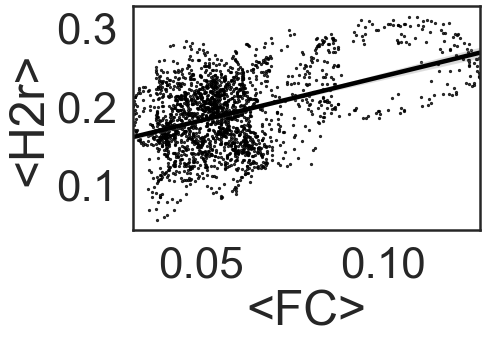

In [160]:
sns.set_context("poster", font_scale=2)
sns.set_style('white')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(fc_right[1024:1024+2048,:].mean(axis=1), 
                  fc_herit_right[1024:1024+2048,:].mean(axis=1),
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='<H2r>')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/FC_herit_FC_corr_RCA.png")


In [161]:
pearsonr(fc_right[1024+2048:1024+2048+1024,:].mean(axis=1), 
         fc_herit_right[1024+2048:1024+2048+1024,:].mean(axis=1))

(0.424053530724329, 5.956411285720667e-46)

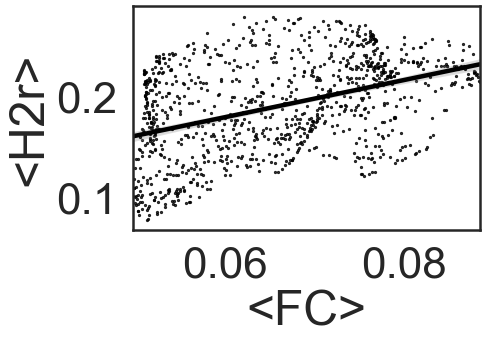

In [162]:
sns.set_context("poster", font_scale=2)
sns.set_style('white')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6));
ax  = sns.regplot(fc_right[1024+2048:1024+2048+1024,:].mean(axis=1), 
                  fc_herit_right[1024+2048:1024+2048+1024,:].mean(axis=1),
                  scatter_kws={'s': 5}, color='k')
                 
ax.set(xlabel='<FC>', ylabel='<H2r>')    
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig("../figures/FC_herit_FC_corr_RDG.png")


### get the gradients of heritability of mean FC, Right

In [284]:
# data dir
ddir     = '../data/tout_hippoc/'   

# ALIGN to the left hipp. gradients
group_gradient_file = '../data/tout_group/Hmean709connGradients_left.h5'
with h5py.File(group_gradient_file, 'r') as g:
    group_gradients = np.array(g['gradients_'])  # (4096, 10)
print(': We had computed group-level gradients : ', group_gradients.shape)  


fc_herit_right_RSUB   = fc_herit_right[0:1024, :]
group_gradients_LSUB  = group_gradients[0:1024,:]

# aligning individual gradient to group-level gradient
galign = GradientMaps(kernel = 'normalized_angle', 
                      approach = 'dm', 
                      alignment = 'procrustes')

galign.fit(fc_herit_right_RSUB, reference = group_gradients_LSUB)

G1_RSUB = galign.gradients_[:,0]  
G2_RSUB = galign.gradients_[:,1]  
G3_RSUB = galign.gradients_[:,2]  


fc_herit_right_RCA   = fc_herit_right[1024:1024+2048, :]
group_gradients_LCA  = group_gradients[1024:1024+2048,:]

# aligning individual gradient to group-level gradient
galign = GradientMaps(kernel = 'normalized_angle', 
                      approach = 'dm', 
                      alignment = 'procrustes')

galign.fit(fc_herit_right_RCA, reference = group_gradients_LCA)

G1_RCA = galign.gradients_[:,0]  
G2_RCA = galign.gradients_[:,1]  
G3_RCA = galign.gradients_[:,2]  


fc_herit_right_RDG   = fc_herit_right[1024+2048:1024+2048+1024, :]
group_gradients_LDG  = group_gradients[1024+2048:1024+2048+1024,:]

# aligning individual gradient to group-level gradient
galign = GradientMaps(kernel = 'normalized_angle', 
                      approach = 'dm', 
                      alignment = 'procrustes')

galign.fit(fc_herit_right_RDG, reference = group_gradients_LDG)

G1_RDG = galign.gradients_[:,0]  
G2_RDG = galign.gradients_[:,1]  
G3_RDG = galign.gradients_[:,2]  



: We had computed group-level gradients :  (4096, 10)


In [285]:
# get the right group grads for the correlation

group_gradient_file = '../data/tout_group/Hmean709connGradients_right.h5'
with h5py.File(group_gradient_file, 'r') as g:
    group_gradients = np.array(g['gradients_'])  # (4096, 10)
print(': We had computed group-level gradients : ', group_gradients.shape)  

group_gradients_RSUB  = group_gradients[0:1024,:]
group_gradients_RCA   = group_gradients[1024:1024+2048,:]
group_gradients_RDG   = group_gradients[1024+2048:1024+2048+1024,:]





: We had computed group-level gradients :  (4096, 10)


### Procrustes Check

In [291]:
# pearsonr(G1_RSUB, group_gradients_RSUB[:,0]) ---> this was negative
G1_RSUB = -1*G1_RSUB
pearsonr(G1_RSUB, group_gradients_RSUB[:,0])

(0.4197611947427344, 5.717735429315205e-45)

In [292]:
pearsonr(G1_RSUB, group_gradients_RSUB[:,1])

(-0.04344708389997388, 0.16475230273646818)

In [293]:
pearsonr(G1_RCA, group_gradients_RCA[:,0])

(0.634206952535616, 7.02856416335242e-231)

In [294]:
pearsonr(G1_RCA, group_gradients_RCA[:,1])

(-0.018343983321105928, 0.40669886298139657)

In [296]:
# pearsonr(G1_RDG, group_gradients_RDG[:,0]) --> this was negative
G1_RDG = -1*G1_RDG
pearsonr(G1_RDG, group_gradients_RDG[:,0])

(0.372994162337558, 3.778339327248738e-35)

In [297]:
pearsonr(G1_RDG, group_gradients_RDG[:,1])

(0.4887581971567371, 1.3424274744218648e-62)

In [298]:
pearsonr(G2_RSUB, group_gradients_RSUB[:,1])

(0.020736480196041053, 0.5074406153895593)

In [299]:
pearsonr(G2_RSUB, group_gradients_RSUB[:,0])

(-0.6169306232366848, 2.0056367517358044e-108)

In [300]:
pearsonr(G2_RCA, group_gradients_RCA[:,1])

(0.03237477624585573, 0.14302884160976714)

In [301]:
pearsonr(G2_RCA, group_gradients_RCA[:,0])

(0.058777100513244925, 0.007799592618673137)

In [304]:
## pearsonr(G2_RDG, group_gradients_RDG[:,1]) --> this was negative
G2_RDG = -1*G2_RDG
pearsonr(G2_RDG, group_gradients_RDG[:,1])

(0.1796439830011202, 7.091599529808307e-09)

In [305]:
pearsonr(G2_RDG, group_gradients_RDG[:,0])

(0.5408943530953163, 7.116491410149451e-79)

In [306]:
G1 = np.concatenate((G1_RSUB, G1_RCA, G1_RDG), axis=0)
G2 = np.concatenate((G2_RSUB, G2_RCA, G2_RDG), axis=0)
G3 = np.concatenate((G3_RSUB, G3_RCA, G3_RDG), axis=0)

G = np.array([G1, G2, G3]).T
G.shape


###
h = h5py.File('../data/tout_group/Hmean709_FC_herit_gradients_right.h5', 'w')
h.create_dataset('gradients', data = G)
h.close()
###



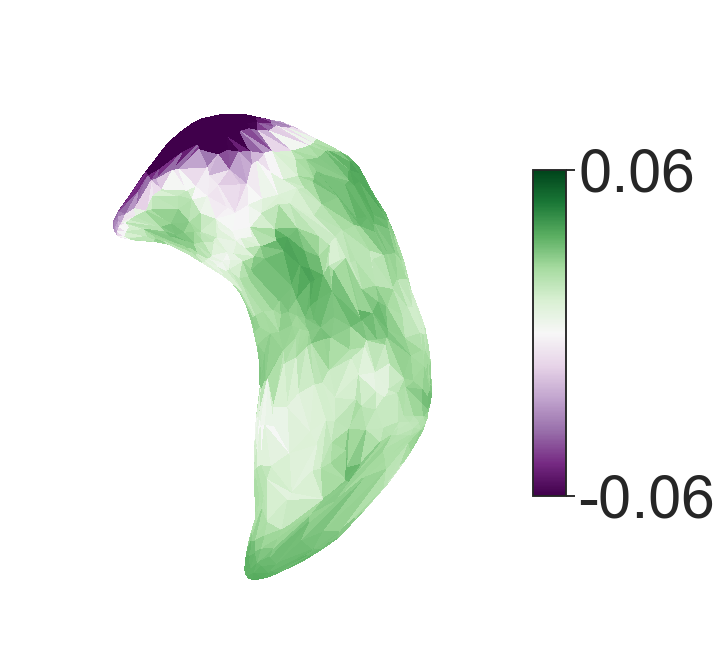

In [310]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  G1_RSUB, 'PRGn', -0.06, 0.06)

#plt.savefig('../figures/FC_herit_G1_rsub.png',
#            format='png',dpi=300)

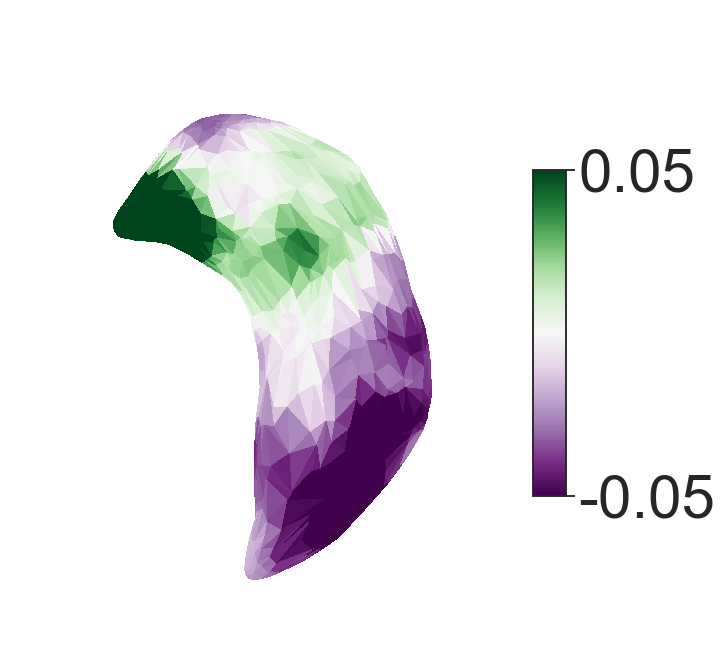

In [311]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                  plot_funcs.yRSUB, 
                                  plot_funcs.zRSUB, 
                                  plot_funcs.triRSUB, 
                                  G2_RSUB, 'PRGn', -0.05, 0.05)

plt.savefig('../figures/FC_herit_G2_rsub.png',
            format='png',dpi=300)

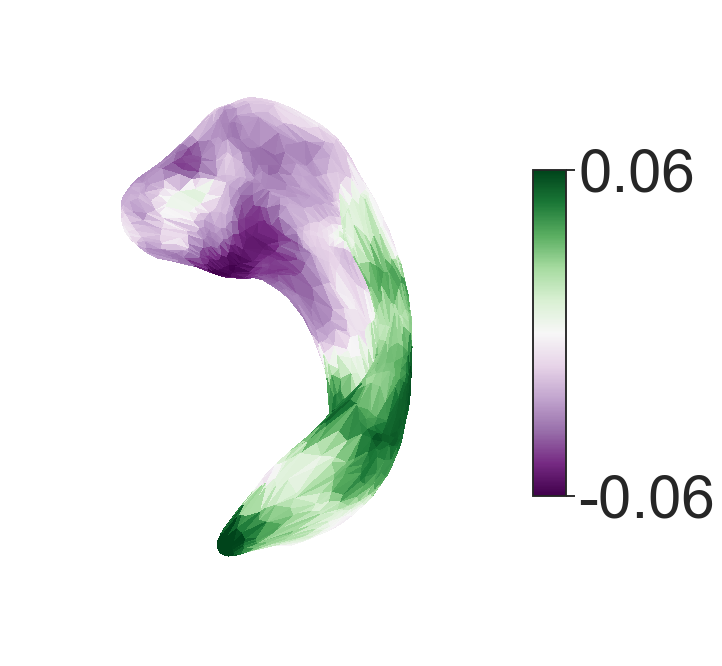

In [315]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  G1_RCA, 'PRGn', -0.06, 0.06)

#plt.savefig('../figures/FC_herit_G1_rca.png',
#            format='png',dpi=300)

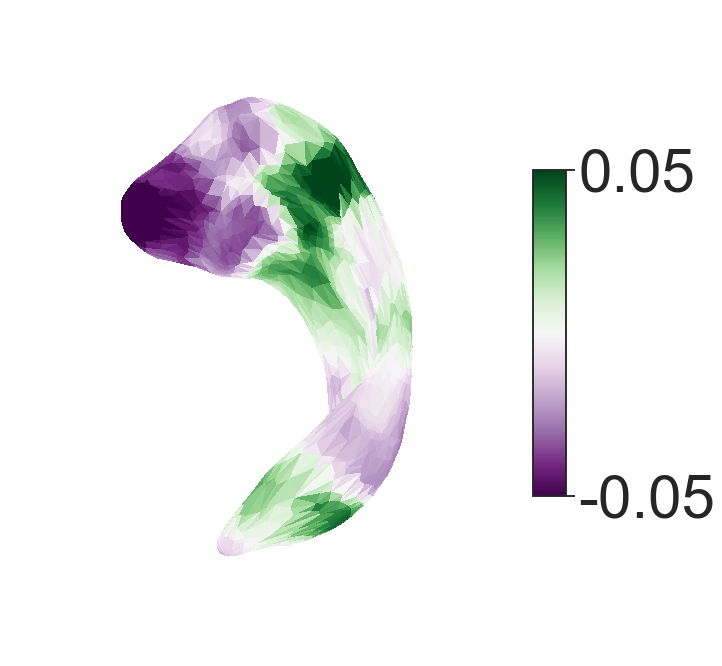

In [317]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                  plot_funcs.yRCA, 
                                  plot_funcs.zRCA, 
                                  plot_funcs.triRCA, 
                                  G2_RCA, 'PRGn', -0.05, 0.05)

#plt.savefig('../figures/FC_herit_G2_rca.png',
#            format='png',dpi=300)

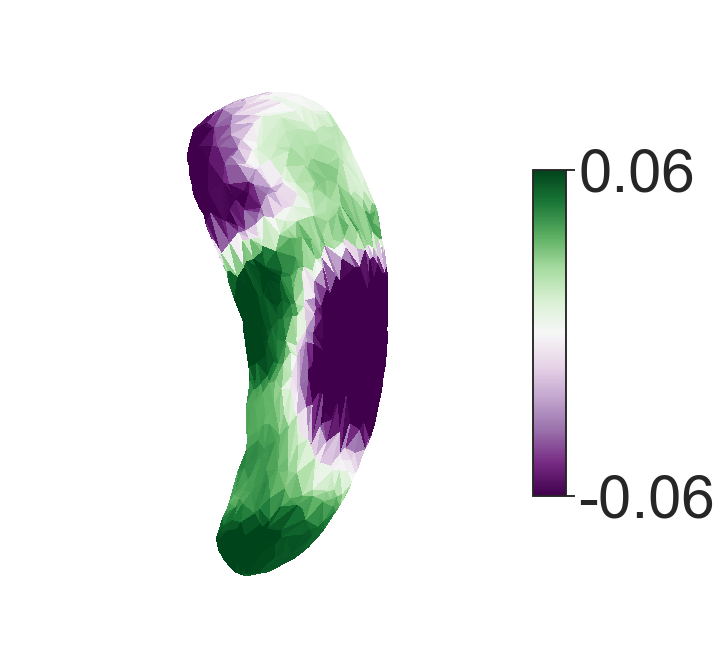

In [319]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRDG, 
                                  plot_funcs.yRDG, 
                                  plot_funcs.zRDG, 
                                  plot_funcs.triRDG, 
                                  G1_RDG, 'PRGn', -0.06, 0.06)

#plt.savefig('../figures/FC_herit_G1_rdg.png',
#            format='png',dpi=300)

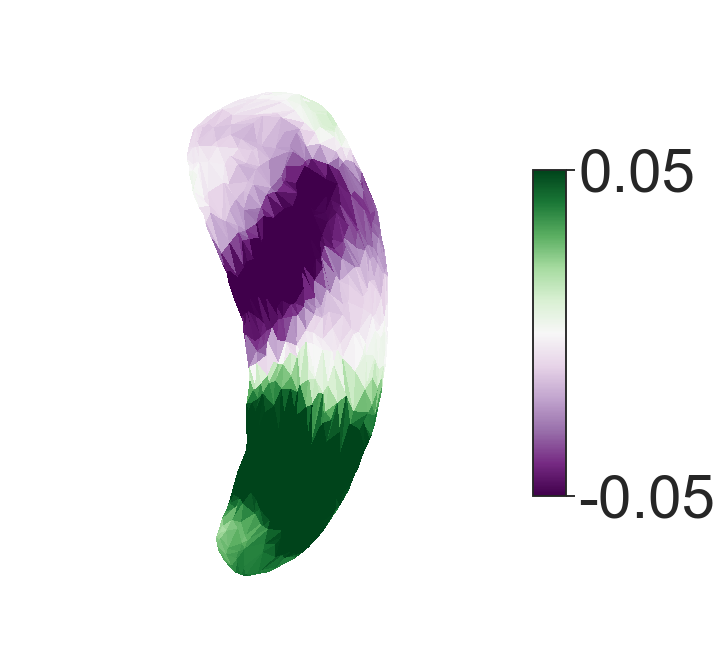

In [321]:
fig = plot_funcs.plot_surf_upper2(plot_funcs.xRDG, 
                                  plot_funcs.yRDG, 
                                  plot_funcs.zRDG, 
                                  plot_funcs.triRDG, 
                                  G2_RDG, 'PRGn', -0.05, 0.05)

#plt.savefig('../figures/FC_herit_G2_rdg.png',
#            format='png',dpi=300)